In [56]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Load data
rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")

# Clean data
rf["date"] = pd.to_datetime(rf["date"])
rf["skills_list"] = rf["skills_list"].apply(
    lambda skills: ast.literal_eval(skills) if isinstance(skills, str) else skills
)


In [57]:
"""let's foncus on Statistician job title"""

stat = rf[rf["job_title"] == "Statistician"].copy()


stat["month_num"] = rf["date"].dt.month
stat["month_num"]
stat

stat_explode = stat.explode("skills_list")
stat_explode


,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,num_of_jobs,job_title,skills,skills_list,month_num
3,E09000004,bexley,1999-07-05,18621.0,NaN,21386.0,18.0,217458.0,160000.0,Statistician,"Python, Machine Learning, R, Data Analysis",Probability,7
3,E09000004,bexley,1999-07-05,18621.0,NaN,21386.0,18.0,217458.0,160000.0,Statistician,"Python, Machine Learning, R, Data Analysis",SAS,7
3,E09000004,bexley,1999-07-05,18621.0,NaN,21386.0,18.0,217458.0,160000.0,Statistician,"Python, Machine Learning, R, Data Analysis",Regression,7
4,E09000005,brent,1999-12-12,18532.0,NaN,20911.0,6.0,260317.0,134000.0,Statistician,"Data Analysis, Statistical Modeling, R",Statistics,12
4,E09000005,brent,1999-12-12,18532.0,NaN,20911.0,6.0,260317.0,134000.0,Statistician,"Data Analysis, Statistical Modeling, R",Data Cleaning,12
4,E09000005,brent,1999-12-12,18532.0,NaN,20911.0,6.0,260317.0,134000.0,Statistician,"Data Analysis, Statistical Modeling, R",Machine Learning,12
5,E09000006,bromley,1999-09-08,NaN,NaN,21293.0,13.0,NaN,113000.0,Statistician,"Statistical Modeling, Data Analysis, R, Machin...",R,9
5,E09000006,bromley,1999-09-08,NaN,NaN,21293.0,13.0,NaN,113000.0,Statistician,"Statistical Modeling, Data Analysis, R, Machin...",Python,9
5,E09000006,bromley,1999-09-08,NaN,NaN,21293.0,13.0,NaN,113000.0,Statistician,"Statistical Modeling, Data Analysis, R, Machin...",Data Analysis,9
6,E09000007,camden,1999-11-03,23677.0,NaN,30249.0,13.0,NaN,84000.0,Statistician,"R, Machine Learning, Python, Statistical Modeling",NaN,11


In [58]:
"""we may use fillna=0 in order to fill out the Nah values"""
pivot_explode = stat_explode.pivot_table(index="month_num",columns="skills_list",aggfunc="size", fill_value=0)
pivot_explode

skills_list,Data Analysis,Data Cleaning,Machine Learning,Probability,Python,R,Regression,SAS,Statistics
month_num,,,,,,,,,
1,0,0,0,1,0,0,1,1,0
2,0,1,1,1,0,0,1,1,1
3,1,0,0,0,1,1,0,0,0
7,0,0,0,2,0,0,2,2,0
9,1,0,0,1,1,1,1,1,0
11,1,0,0,0,1,1,0,0,0
12,0,1,1,0,0,0,0,0,1


In [ ]:
pivot_explode.plot(kind="bar")

In [66]:
"""in order to create a new row in dataframe we may use loc method"""
"""еo add a new row to a pandas DataFrame, you typically use the .loc[] method"""
pivot_explode.loc["Total"] = pivot_explode.sum()
pivot_explode

# pivot_explode.loc["Total"].sort_values(ascending=False).index
pivot_furth = pivot_explode[pivot_explode.loc["Total"].sort_values(ascending=False).index]



In [67]:
"""after sorting the columns let's now drop the total row"""

pivot_furth = pivot_furth.drop("Total")
pivot_furth


skills_list,Probability,Regression,SAS,Data Analysis,Python,R,Data Cleaning,Machine Learning,Statistics
month_num,,,,,,,,,
1,1,1,1,0,0,0,0,0,0
2,1,1,1,0,0,0,1,1,1
3,0,0,0,1,1,1,0,0,0
7,2,2,2,0,0,0,0,0,0
9,1,1,1,1,1,1,0,0,0
11,0,0,0,1,1,1,0,0,0
12,0,0,0,0,0,0,1,1,1


<Axes: xlabel='month_num'>

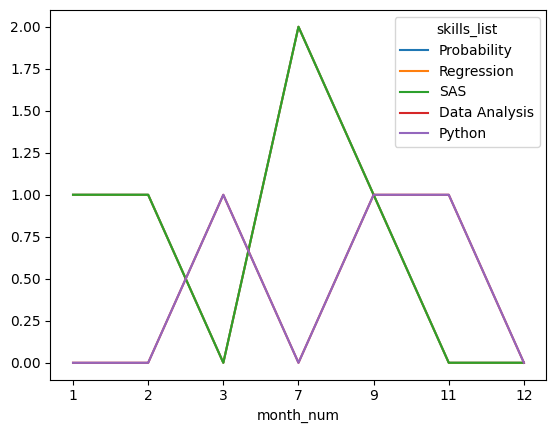

In [72]:
pivot_furth.iloc[:,:5].plot(kind="line")